---
> 「中学生までは勉強嫌いで、何のために勉強しているのかほとんど理解していませんでした。」  
>天野浩(85年に青色LEDの材料となるGaNの透明結晶製造に成功)
---

# GANとは

Generative Adversarial Network（敵対的生成ネットワーク）と呼ばれるDNNモデルの一種
- 入力データの特徴を学習し、結果的に存在するデータの特徴をとらえた実在しないデータの生成することができる
- GANは、Generator（生成ネットワーク）とDiscriminator（識別ネットワーク）で構成され、互いに競い合わせながら学習を進める
  - 贋作者（Generator）と鑑定士（Discriminator）で競争させて学習させることから敵対的と呼ばれる
  - この競い合わせるというのが重要で、片側だけが先走って学習が進むと失敗する
  - 学習する際には、「少し難しい内容を次々と学ぶ」ことが重要で「いきなり高度な内容は学習できない」ということを意味しており、人間と同じである
  - 実際には、本物のデータと偽物のデータを交互に与えるなどして、判定させる


## GANの特徴

GANが使われるシーンは、例えば、
- 誰かに似せた**自然な**絵を自動で描かせたい
- よくある**偽物とわかりにくい**フェイク画像や動画、音声などを作らせたい
- **あたかもそこにありそうなもの**をないところから追加したい
- 逆にあって邪魔なものを**あたかもなかったかのように自然に**消し去りたい

といった用途が思い当たる

簡単に共通するのは、
- 人間が判断して違和感がなく自然であること
- 自由に生成できること

であろう

この魔法を実現するような内容から、AI関連で話題をさらうのは主にGAN応用であることもうなずける

GANでは2つのモデルを競合させるように学習させる**巧妙**な手法である

GANのその他の特徴として、次のような点を挙げることができる
- 教師なし学習が可能
- データのラベリングが不要
  - というか、そういう問題を扱うことが特異
- ラベリングが無いため学習が不安定になりやすい
  - 学習を安定させる工夫が必要で、様々提案されている

## DiscriminatorとGenerator

DiscriminatorとGeneratorという2つのモデルを贋作者と鑑定士にたとえたが、この対立する目的を持つモデル同士を競わせる過程をAdversarial(敵対的) Processと呼ぶ

<img src="http://class.west.sd.keio.ac.jp/dataai/text/ganfig.png" width=500>

Generatorは一様分布や正規分布などからサンプリングしたノイズベクトル$z$をもとに、アップサンプリングして画像を生成する
- この辺りが何を言っているか？というのが最初はつかみにくいかもしれない
- やりたいことは、「自由に生成できること」であるため、この「自由に」を表現するには乱数がどうしても必要となる
  - つまり、乱数としての潜在空間から何かが作れたら、「自由な生成」を実現できるという発想

一方，Discriminatorは単純な分類問題を解くネットワークでGeneratorが生成した画像と本物の画像を分類する

この２つのネットワークを交互に学習すれば、Generatorは本物のデータに近いデータを生成するようになる

特に、Generatorの入力が乱数で、かつ、DiscriminatorはReal画像と、Generator画像(偽画像)を交互(もしくはランダムに)受け付けて、出力はその真偽のみという構成を持つ

もちろん、これだけではうまく動作しない


## DiscriminatorとGeneratorの目的

Descriminatorの目的は明瞭で、予測値と実際の値が一致すればよく、より具体的にはデータを適切に分類する決定境界を見つけることが目標である

しかしながら、Generatorは、乱数だけ入力され、それに対して勝手に生成した謎なデータを出力し、その出力が妥当なデータでなければならない
- つまり、Generatorは**正解となる出力値がない**状況で、妥当な出力を出す必要がある
- これでは、学習は進まず、何か目的・目標が必要となる

Generatorは、**データに近いモデル分布を見つける**ことを目標とする

- すなわち、Generatorは「今観測できているデータは、なんらかの確率分布に基づいて生成されている」という仮定に基づき、データを生成する確率分布そのものをモデル化しようと試みることであるといえる


## GANの定式化

定式化にあたり、先ほどの図における入力としてのDataset、乱数、判定結果を次のように定める

<img src="http://class.west.sd.keio.ac.jp/dataai/text/gan1.svg" width=500>

このように定めると、Datasetとしての入力の確率変数$x$に対して、Discriminatorに入力されるReal dataの分布$p_d(x)$と、Fake dataの分布$p_g(x)$、これらの2つの確率分布の「距離」を近づけることを目的とするといえる

もちろんであるが、Generatorは明確に$x$の入力を持っておらず、その分布は明示的に与えられていない
- よって、例えば生成結果とデータ分布との尤度を直接計算するなどして、生成結果とデータ分布との近さを測るなどということはできない



### Descriminatorの定式化

では、実際にDiscriminatorに入力されるデータ分布$p_d(x)$を求めるとはどういうことか？

GANでは直接尤度を測る代わりに、リアルデータの分布$p_d(x)$とフェイクデータの分布$p_g(x)$の密度比$r(x)$を考える
$$
r(x) = \frac{p_d(x)}{p_g(x)}
$$

ここで、データ分布あるいはモデル分布から生成されたラベル付きのデータ集合$\{(x1,y1),⋯,(xN,yN)\}$を考え、データ分布により生成されたデータのラベルをy=1、モデル分布により生成されたデータのラベルをy=0とすると、それぞれの分布は次のように表される

$$
p_d(x) = p(x|y = 1)\\
p_g(x) = p(x|y = 0)
$$

この時、密度比$r(x)$はベイズの式により次のように表すことができる

$$
\begin{align}
r(x) &= \frac{p(x|y = 1)}{p(x|y = 0)}\\
&= \frac{p(y = 1| x)p(x)}{p(y=1)}\cdot\frac{p(y=0)}{p(y=0|x)p(x)}
\end{align}
$$

ここで、$\pi = p(y=1)$とすると、
$$
\begin{align}
r(x) &= \frac{p(y = 1|x)}{p(y = 0| x)}\cdot\frac{1-\pi}{\pi}
\end{align}
$$

となる

$\pi$は実際のデータ数の比で近似できる
- 実際には$1/2$になるため、
$$
\begin{align}
r(x) &= \frac{p(y = 1|x)}{p(y = 0| x)}
\end{align}
$$
としてよい

ラベルは$y=0$か$y=1$のみであるため、$p(y=1∣x)$を推定できれば、密度比$r(x)$が求まる
- そこで、$p(y=1∣x)$を近似する分布を、例えばNNを用いて求めることを考えて、パラメータ$\varphi$を用いて$q_\varphi(y=1∣x)$とする

これを式で書くと

$$
p(y = 1| x) \approx q_\varphi(y = 1| x)
$$
となる

$q_\varphi(y = 1| x)$を見出すモデルをDescriminatorと呼び、$D(\phi; x)$と表す
- 本来密度比を考える問題が、分類問題と同じ確率的分類器の最適化問題に置き換わった

この最適化に用いる誤差関数$U(D)$は、例えば、交差エントロピーを想定すれば、
$$
U(D) = -E_{p(x,y)}[y \ln D(\phi; x) + (1-y) \ln (1-D(\phi; x))]
$$
として平均を考えればよい

これを変形すると、
$$
\begin{align}
U(D) &= -E_{p(x,y)}[y \ln D(\phi; x) + (1-y) \ln (1-D(\phi; x))]\\
&= -E_{p(x|y)p(y)}[y \ln D(\phi; x) + (1-y) \ln (1-D(\phi; x))]\\
&= -E_{p(x|y=1)p(y=1)}[\ln D(\phi; x)] + E_{p(x|y=0)p(y=0})[ \ln (1-D(\phi; x))]\\
&= \pi \cdot E_{p_d(x)}[\ln D(\phi;x)]+(1-\pi)\cdot E_{p_g(x)}[\ln (1-D(\phi;x))]
\end{align}
$$

となる

各ラベルのデータを与えるとき、データが丁度同数づつ混ざっていれば、y=0およびy=1となるラベルのデータ数が等しい場合$\pi = \frac{1}{2}$となることから、Descriminatorの目的関数$V(D)$は、

$$
V(D) = E_{p_d(x)}[\ln D(\phi;x)]+E_{p_g(x)}[\ln (1-D(\phi;x))]
$$

となり、これが最大となるように訓練することになる

### Generatorの定式化

潜在変数$z$を仮定すると、

$$
p_g(x) = \int{p(x|z)p(z)}dz
$$

となる

先ほどと同様に、$p(x|z)$を近似する分布として$q_\theta(x|z)$を導入すると

$$
p(x|z) \approx q_\theta(x|z)
$$

となる

この$q_\theta(x|z)$を推定するモデルをGeneratorと呼び$G(\theta;z)$と表す

Generatorの目的関数は、Descriminator $D(\varphi;x)$について最適なDescriminator $D^*(\varphi;x)$が得られたとすると、

$$
V(D^*, G) = E_{p_d(x)}[\ln D^*(x)]+E_{p(z)}[\ln (1-D^*(G(\theta;z))]
$$

となる

この初項はデータセットのみに依存して、$z$に依存していない。よって、定数と考えてよいため、結果的に、

$$
V(D^*, G) = E_{p(z)}[\ln (1-D^*(G(\theta;z))]
$$

とみなしてよい

つまり、Generatorは、この$V(D^*, G)$を最小化することが目的となる




### GAN全体の定式化

さて、実際に用いる目的関数は次の通りとなる

Discriminatorは、Generator$G(\theta;z)$を固定したうえで、
$$
\mathop{\rm max}\limits_{\phi}
E_{p_d(x)}[\ln D(\phi;x)]+E_{p(z)}[\ln (1-D(\phi;G(\theta;z))]
$$
を計算する

Generatorは、Descriminator$D(\phi;x)$を固定したうえで、
$$
\mathop{\rm min}\limits_{\theta}
E_{p(z)}[\ln (1-D(\phi;G(\theta;z))]
$$

を計算する

DとGは包含関係にあり、このことがいわゆる2つのネットワークを互いに競わせるように学習するという意味である

より簡潔には、
$$
\mathop{\rm min}\limits_{G}\mathop{\rm max}\limits_{D} V(D, G)
$$
と表すことができ、学習が進むと、生成器$G(\theta;z)$が生成するデータは、実際のデータに近くなる


## GANのロスについて

GANはDを騙すように訓練することでGの訓練が進む
- DやGの一方（特にD）が強すぎるとGの訓練が止まる
- DとGの損失ギャップが少ないほど訓練が進みやすい

つまりお互いにロスが拮抗するように学習が進むとよく、片方が強くなりすぎ、ロスが乖離するとうまくいかない
- 特によく見受けられるのはGよりDが強くなり、途中からGの学習が進まずDを騙すことができなくなるケース

## GANの評価指標

GANは教師なし学習であり、教師あり学習で用いられるAccuracy, F1 scoreといった評価指標がない

妥協案として、次の2つがしばしば利用されるが、学習済みモデルを利用するため面倒である
- したがって、BCEロスや、L1ロス(平均絶対値誤差)を用いたりすることも普通に行われている

### Frechet Inception Distance(FID:フレシェ開始距離)

生成された画像の分布と元の画像の分布がどれだけ近いかを測る指標があればよいが、この近さをどのように表現するかが問題となる

そこで、人間を超える画像認識精度をもつようになった機械学習モデルを用い、画像を低次元の潜在空間で表現し、その空間で距離を測るというコンセプト

実際には、Inception V3の事前トレーニング済みモデルを使用し、実画像と偽画像の特徴ベクトルを抽出する

具体的には次の式で求める
- なお、m,cは埋め込み空間上での平均ベクトルおよび共分散行列
- 添字wは生成画像を意味し、何もついていないものは実画像を意味する
- 距離を表すため、値は小さいほど実画像に近いことを意味し、Generator性能がより優れていることを示す
- ベクトル$X$および$Y$の大きさを$\mu_X$、$\mu_Y$、それらの共分散行列を$\sum_X$、$\sum_Y$と表す、
- $T_r$は行列のトレース(linear_algebra)を表す

$$
FID = ||\mu_X-\mu_Y||^2_2+T_r(\sum_X+\sum_Y-2\sum_X\sum_Y)
$$

なお、本来フレシェ距離は2つの「多変量」正規分布間の距離を計算するために利用

### Perceptual Path Length(PPL)

人間の感覚、つまり視覚・知覚的に潜在空間上で画像が滑らかに変化するかを表す指標

FIDと同様に学習済みモデルにおける潜在空間での距離を利用する

- 画像を生成する種となる潜在空間上で、画像の変化は『知覚的』に短距離で変化しているか」を表す指標
  - モーフィングのようにずれることなくダイレクトかつまっすぐに変化すれば小さな値をとるため、潜在空間がどれだけ適切に構築されているかを評価できる

- 例えば画像認識モデルであるVGGを使用し、その上での特徴量ベクトルの距離を用いる。解析的に求めることができないため、多くの画像を用意し、実際に距離を求めて平均値を算出することでPPLを得る

- この値が小さいほど潜在空間が知覚的に滑らかであることを意味する

# GANの実際

MNISTを用いて、MNISTっぽいデータを生み出すGANを構成する
- 似た動作を行うAutoEncoderとも比較するとよい

今回は正確にはGeneratorとDiscriminatorに畳み込みニューラルネットを利用しており、**DCGAN(Deep Convolutional Generative Adversarial Networks)**と呼ばれる

今回の実装におけるDiscriminatorとGeneratorは次の通りである

**Discriminator**

一般的な畳み込みニューラルネットワークを利用している
- ただし、MaxPoolingを使わずにstride=2として画像サイズを半分にする

**Generator**
入力$z$は62次元の乱数ベクトル、これをシードとして画像を生成する

最初に全結合網を用いてサイズを拡大する
- 6272次元まで拡張し$7\times 7\times 128$のテンソルに変換
- ConvTranspose2Dでチャネルを減らしつつ、画像サイズをMNISTの$28 \times 28$ピクセルまで拡張する
- 出力は1チャンネル$28 \times 28$ピクセルの画像となる



In [ ]:
cuda = "cuda:0"
import os
import pickle
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
device = torch.device(cuda if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


ハイパーパラメータは次の通り

In [ ]:
# hyperparameters
batch_size = 128
lr = 0.0002
z_dim = 62
num_epochs = 25
sample_num = 16
log_dir = './logs'

MNISTデータの読み込みとDataLoaderの設定

今回は、訓練用とテスト用に分ける必要はない

In [ ]:
transform = transforms.ToTensor()
dataset = datasets.MNIST('data/mnist', train=True, download=True, transform=transform)
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 389107162.86it/s]


Extracting data/mnist/MNIST/raw/train-images-idx3-ubyte.gz to data/mnist/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 41513260.39it/s]


Extracting data/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to data/mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 150198531.80it/s]

Extracting data/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to data/mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 22760488.37it/s]


Extracting data/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/mnist/MNIST/raw



## GeneratorとDiscriminatorの定義

GeneratorとDiscriminatorの定義は次のようになる
- 同様に似たようなデータを作り出す方法としてAutoEncoderを学んだ
- AEでは基本的にEncoderとDecoderは対称形とするが、GANでは目的が異なるため異なる構造になる



In [ ]:
class Generator(nn.Module):
  def __init__(self):
    super(Generator, self).__init__()
    self.fc = nn.Sequential(
      nn.Linear(62, 1024),
      nn.BatchNorm1d(1024),
      nn.ReLU(),
      nn.Linear(1024, 128 * 7 * 7),
      nn.BatchNorm1d(128 * 7 * 7),
      nn.ReLU(),
    )
    self.deconv = nn.Sequential(
      nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
      nn.BatchNorm2d(64),
      nn.ReLU(),
      nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1),
      nn.Sigmoid(),
    )
    initialize_weights(self)
  def forward(self, input):
    x = self.fc(input)
    x = x.view(-1, 128, 7, 7)
    x = self.deconv(x)
    return x

class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator, self).__init__()
    self.conv = nn.Sequential(
      nn.Conv2d(1, 64, kernel_size=4, stride=2, padding=1),
      nn.LeakyReLU(0.2),
      nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
      nn.BatchNorm2d(128),
      nn.LeakyReLU(0.2),
    )
    self.fc = nn.Sequential(
      nn.Linear(128 * 7 * 7, 1024),
      nn.BatchNorm1d(1024),
      nn.LeakyReLU(0.2),
      nn.Linear(1024, 1),
      nn.Sigmoid(),
    )
    initialize_weights(self)
  def forward(self, input):
    x = self.conv(input)
    x = x.view(-1, 128 * 7 * 7)
    x = self.fc(x)
    return x

### ウェイトの初期化

これまであまり問題としなかったが、GANでは学習を安定的に進めるために様々な工夫がなされた経緯がある
- その一つがウェイトの初期化である
- ただし、現時点で必須の方法というわけでも、一般的な方法というわけではない
  - 特に何もしなくてもよい
- 一方で、パラメタ初期化の違いで学習結果に違いが出る可能性もあり、ここでまとめて扱う

まず、PyTorchのパラメーター初期化について簡単に説明する

これまでは、Noneとしてゼロ初期化のみ議論してきた

パラメータ(重み)は`nn.Linear()`などとしたときに設計され(インスタンス化した時に実態ができる)、その値はインスタンス化した後weightメソッドを使うことでを見ることができる
```
linear = nn.Linear(5, 2)
linear.weight
```
また、逆にweightに対してnn.init の中のメソッドを適用すれば初期化できる

この初期化においては、次のような分布や定数の利用が想定できるので、例を示す

- 正規分布:`normal_(weight, mean, std)`
```
linear = nn.Linear(5, 2)
nn.init.normal_(linear.weight, 0.0, 1.0)
```
- 一様分布:`uniform_(weight, a, b)`
```
linear = nn.Linear(5, 2)
nn.init.normal_(linear.weight, 0.0, 1.0)
```

- 定数:`constant_(weight, c)`
```
linear = nn.Linear(5, 2)
nn.init.constant_(linear.weight, 1.0)
```

- Xavierの初期値:`xavier_normal_(weight, gain=1)`
```
linear = nn.Linear(5, 2)
nn.init.xavier_normal_(linear.weight)
```

- Heの初期値
```
kaiming_normal_(weight, a=0, mode='fan_in', nonlinearity='leaky_relu')
linear = nn.Linear(5, 2)
nn.init.kaiming_normal_(linear.weight)
```

その効果とより詳しい説明はこのテキストの末尾に示す


### Discriminatorのウェイトの初期化について、

ここでは、全て正規分布で初期化しており、専用の関数(メソッド)を定義している
- Discriminatorクラスから呼び出される

In [ ]:
def initialize_weights(model):
  for m in model.modules():
    if isinstance(m, nn.Conv2d):
      m.weight.data.normal_(0, 0.02)
      m.bias.data.zero_()
    elif isinstance(m, nn.ConvTranspose2d):
      m.weight.data.normal_(0, 0.02)
      m.bias.data.zero_()
    elif isinstance(m, nn.Linear):
      m.weight.data.normal_(0, 0.02)
      m.bias.data.zero_()

### ネットワークのインスタンス化とオプティマイザの指定
- 今回はAdamで、ハイパーパラメタは微妙にチューニングしている
- また、ロス関数は真偽のみを議論するためバイナリクロスエントロピーを用いる

In [ ]:
G = Generator().to(device)
D = Discriminator().to(device)
G_optimizer = optim.Adam(G.parameters(), lr=lr, betas=(0.5, 0.999))
D_optimizer = optim.Adam(D.parameters(), lr=lr, betas=(0.5, 0.999))
criterion = nn.BCELoss()

## 実際の処理内容

コードを見ると実際何をしているかがよくわかる
- ここではFIDは利用していない

In [ ]:
def train(D, G, criterion, D_optimizer, G_optimizer, data_loader):
  # 訓練モードへ
  D.train()
  G.train()
  # 本物ラベルは1
  y_real = Variable(torch.ones(batch_size, 1))
  # 偽物ラベルは0
  y_fake = Variable(torch.zeros(batch_size, 1))
  y_real = y_real.to(device)
  y_fake = y_fake.to(device)
  D_running_loss = 0
  G_running_loss = 0
  for batch_idx, (real_images, _) in enumerate(data_loader):
    # 一番最後のデータがバッチサイズに満たない場合は無視してエラーを避ける
    if real_images.size()[0] != batch_size:
      break
    # 潜在変数としての入力(変な言い方だが)を乱数で初期化
    z = torch.rand((batch_size, z_dim))
    real_images, z = real_images.to(device), z.to(device)
    # Discriminatorの勾配の初期化
    D_optimizer.zero_grad()
    # Discriminatorは実画像データを1=Trueと認識するほどよい
    D_real = D(real_images)
    D_real_loss = criterion(D_real, y_real)
    # DiscriminatorはGeneratorが生成した偽画像を0=Falseと認識するほどよい
    # fake_imagesをDiscriminatorが学習しないようにdetach()する
    fake_images = G(z)
    D_fake = D(fake_images.detach())
    D_fake_loss = criterion(D_fake, y_fake)
    # 2つのlossの和を最小化する
    D_loss = D_real_loss + D_fake_loss
    D_loss.backward()
    D_optimizer.step()  # Dだけ更新(Gのパラメータは更新しない)
    D_running_loss += D_loss.data.item()
    # Generatorの更新
    G_optimizer.zero_grad()
    # GeneratorにとってGeneratorが生成した画像の認識結果は1(本物)に近いほどよい
#    fake_images = G(z)
    D_fake = D(fake_images)
    G_loss = criterion(D_fake, y_real)
    G_loss.backward()
    G_optimizer.step()
    G_running_loss += G_loss.data.item()
  D_running_loss /= len(data_loader)
  G_running_loss /= len(data_loader)
  return D_running_loss, G_running_loss

### 途中結果の確認

学習途中で、お試しに画像を保存するため、適当な$z$から画像を生成させる

In [ ]:
def generate(epoch, G, log_dir='logs'):
  G.eval()
  if not os.path.exists(log_dir):
    os.makedirs(log_dir)
  # 生成のもとになる乱数を生成
  sample_z = torch.rand((64, z_dim))
  sample_z = sample_z.to(device)
  # Generatorでサンプル生成
  samples = G(sample_z).data.cpu()
  save_image(samples, os.path.join(log_dir, 'epoch_%03d.png' % (epoch)))

## 学習

実際にGANを学習させる
- 10分程度必要

In [ ]:
history = {}
history['D_loss'] = []
history['G_loss'] = []
for epoch in range(num_epochs):
  D_loss, G_loss = train(D, G, criterion, D_optimizer, G_optimizer, data_loader)
  print('epoch %d, D_loss: %.4f G_loss: %.4f' % (epoch + 1, D_loss, G_loss))
  history['D_loss'].append(D_loss)
  history['G_loss'].append(G_loss)
  # 特定のエポックでGeneratorから画像を生成してモデルも保存
  if (epoch+1)%5 == 0:
    generate(epoch + 1, G, log_dir)
    torch.save(G.state_dict(), os.path.join(log_dir, 'G_%03d.pth' % (epoch + 1)))
    torch.save(D.state_dict(), os.path.join(log_dir, 'D_%03d.pth' % (epoch + 1)))
# 学習履歴を保存
with open(os.path.join(log_dir, 'history.pkl'), 'wb') as f:
  pickle.dump(history, f)

epoch 1, D_loss: 0.8601 G_loss: 1.2990
epoch 2, D_loss: 1.0312 G_loss: 1.1403
epoch 3, D_loss: 1.0466 G_loss: 1.1314
epoch 4, D_loss: 1.0437 G_loss: 1.1451
epoch 5, D_loss: 1.0262 G_loss: 1.1749
epoch 6, D_loss: 0.9985 G_loss: 1.2097
epoch 7, D_loss: 0.9693 G_loss: 1.2627
epoch 8, D_loss: 0.9420 G_loss: 1.3031
epoch 9, D_loss: 0.9087 G_loss: 1.3568
epoch 10, D_loss: 0.8831 G_loss: 1.4036
epoch 11, D_loss: 0.8515 G_loss: 1.4672
epoch 12, D_loss: 0.8244 G_loss: 1.5237
epoch 13, D_loss: 0.8061 G_loss: 1.5648
epoch 14, D_loss: 0.7766 G_loss: 1.6233
epoch 15, D_loss: 0.7571 G_loss: 1.6751
epoch 16, D_loss: 0.7191 G_loss: 1.7327
epoch 17, D_loss: 0.7203 G_loss: 1.7808
epoch 18, D_loss: 0.6815 G_loss: 1.8261
epoch 19, D_loss: 0.6794 G_loss: 1.8846
epoch 20, D_loss: 0.6499 G_loss: 1.9299
epoch 21, D_loss: 0.6399 G_loss: 1.9806
epoch 22, D_loss: 0.6133 G_loss: 2.0220
epoch 23, D_loss: 0.6062 G_loss: 2.0738
epoch 24, D_loss: 0.6027 G_loss: 2.1158
epoch 25, D_loss: 0.5781 G_loss: 2.1589


## 結果の表示

DiscriminatorとGeneratorのロス曲線は次の通り

まだまだサチュレーションには至っておらず、より正確な画像を生成でそうである

Discriminatorのロスが減少し、Generatorのロスが増大している
- この場合、エポックの最初の方でほぼ完成された画像が生成されているため、そのあとは乖離が進む
- 学習が上手くいっている場合は、DiscriminatorとGeneratorのロスが拮抗し、お互いにバランスをとって学習が進んでいる状態が望ましい

GANは何が起こっているのか、何が正しいのかを知ることが若干困難
- 拮抗状態にあるのが望ましいが、これが連続するのは正しく学習できているかどうかはわからない
- 乖離するとうまくいっていないという判断もできるが、今回のように早々に「欲しい画像」が生成されており、その後離れていくということもあり得る
- 学習の初期段階で不安定になることも知られており、最初ダメだからと言ってあきらめない方が良い


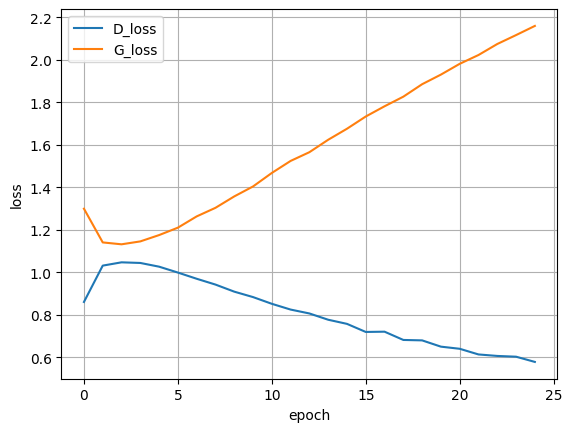

In [ ]:
with open(os.path.join(log_dir, 'history.pkl'), 'rb') as f:
    history = pickle.load(f)
D_loss, G_loss = history['D_loss'], history['G_loss']
plt.plot(D_loss, label='D_loss')
plt.plot(G_loss, label='G_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()

徐々にきれいなMNISTを生成するようになっているのがわかるだろう

--------------------
logs/epoch_005.png


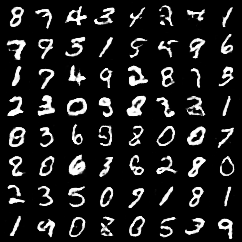

--------------------
logs/epoch_010.png


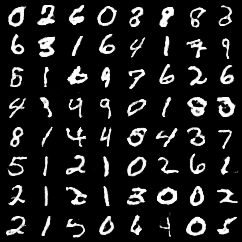

--------------------
logs/epoch_015.png


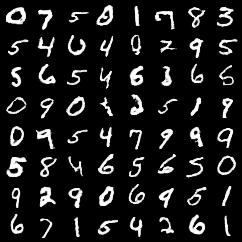

--------------------
logs/epoch_020.png


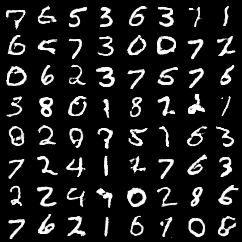

--------------------
logs/epoch_025.png


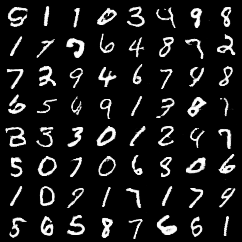

In [ ]:
from IPython.display import Image, display_png
for i in list([5, 10, 15, 20, 25]):
    fname = 'logs/epoch_{:03}.png'.format(i)
    print(20*'-')
    print(fname)
    display_png(Image(fname))

余力がある人は、さらに計算パワーが必要なCelebAを試してみると良い

# 課題1 (考察)

## GANの学習

ここで示したGANでは交互に正解データとGeneratorが作成した偽データを食べさせているが、どうして、「交互に正解、不正解と予測するモデル」とならないのか
- 単純に、1, 0, 1, 0, ...と出力するモデルなのでシンプルかつ正解率100%となる

## Generatorの更新

Generatorの更新について、`D_fake = D(fake_images)`
であり、`fake_images = G(z)`であるから、`D_fake = D(G(z))`となる

これに対して`G_loss`を`G_loss = criterion(D_fake, y_real)`として求めて、
`G_loss.backward()`とし、`G_optimizer.step()`としている

なぜG_lossを求める際にDの計算過程が入っていても問題がないのか？
- そもそも、なぜDが入っているのか？

# いろいろなGAN

様々なGANが存在し、最も基本な形は、適当なベクトルから学習した画像を生成する構成である

以下、その代表例をしめす

- **pix2pix**
画像の対応のペアを入力とし、それがペアとして正しいかどうかを判定して汎用的な画像の変換を行うGAN
  - 通常のGANはベクトルを入力に一枚の画像を生成、判定するが、pix2pixは画像を入力とし、また条件として出力画像を作成し、入力画像と出力画像のペアについて真贋を判定する
  - 画像を条件に画像を生成するためConditionalGANの一種である

- pix2pixHD  
$2048\times 1024$の高解像画像を生成するGAN
  - Generatorを2段構造とし、$1024\times 512$を生成してから、解像度上げる別のGeneratorを用いる

- CycleGAN  
例えばりんごとオレンジの画像など2つの画像変換するように学習したGAN
  - 学習時はこの場合りんごとオレンジの画像群のみあればよい
    - りんごと同じ姿勢、似たような形のオレンジの画像がひつようとなるわけではない
  - ネットワークがループ構造を持ち、オレンジの画像からりんごの画像を生成し、そのりんごの画像を再度オレンジ画像に戻したときの精度が高くなるように学習させる
  - 普通の馬がシマウマになったりできる

- StarGAN  
CycleGANは2つの変換専用に構成するが、複数に対応する
  - 複数のドメイン間を学習するようにAとBのCycleGAN、BとCのCycleGANとせず、1つのGANで複数のGAN間を往来できるようにする

- DCGAN  
  - CNNで構成するGAN
  - 若干役割は終えている

- **PGGAN(Progressive Growing of GAN)**
  - 高解像度の学習を段階的に行うように学習過程を構成することで、$1024\times 1024$という高解像度画像を生成する

  - Progressive-Growing GANで提案された高解像度画像の生成手法
    - 低解像画像の生成から始めて徐々に高解像用のGenerator,Discriminatorを追加することで、最終的に高解像度画像を生成する手法
    - 下図で、最初に$4\times 4$の画像生成から始め、徐々に解像度を上げて最終的には$1024\times 1024$の高解像度画像を生成する
    - StyleGANで利用されているが、StayleGAN2では利用されていない

<img src="http://class.west.sd.keio.ac.jp/dataai/text/ProgressiveGrowing.png" width=500>

- ACGAN  
Discriminatorが真偽判定だけでなく、クラス判定もするように学習させる
  - 効果として、DCGANよりも綺麗な画像生成が可能となる

- **SAGAN**
  - Spectral NormalizationやSelf Attention機構を導入することで現時点で最も高画質な画像生成を行う
  - 局所的な情報だけでなくSelf Attentionで大域的な視野をもって生成する

- ConditionalGAN  
生成して欲しい画像のラベルも同時に入力に与えることで、指定した画像を生成する条件付き画像生成手法
  - ラベルも画像化するため、one-hotで正解は完全に白の画像、不正解は完全に黒の画像で構成し、チャネル数を拡張する

- InfoGAN  
相互情報量を評価関数に導入し、画像の何らかの特徴と意味の取れた関係を持つように学習する
  - Gの入力およびDの出力に潜在空間表現を与え、Dはその潜在空間が何かも判定する
  - この潜在空間には何か意味を与えるなどしなくとも、例えば、MNISTにおいて、回転や傾きに対応した要素や線の太さに対応した要素などが現れる

- StackGAN  
pix2pixHDと同様、StackGANは2段のGANで構成されており、文章から画像を生成する段と、その画像を高精度にする段で構成される
  - 高精度に文章から画像を生成できる

- **AnoGAN**
  - GANはサンプルデータから生成モデルを学習するが、本物の正常入力画像は、それを生成するGeneratorの入力$z$が既知の値になる
  - $z$を使って画像生成し、その生成画像と入力画像との差があった部分を異常個所として判定する
  - 異常個所を色分けして表示できる
  - バックプロパゲーションでzを推定する必要があるため時間がかかる

- **EfficientGAN**
 - AnoGANでは$z$を更新学習するため異常検知に時間がかかる
 - 入力データから$z$を求めることができるエンコーダ$E$、つまり$E=G^{-1}$を構築できればよい
 - しかしながら、$G$や$D$を求めた後で、改めて$G^{-1}$を獲得することが困難であることも知られている(今度は敵対的に獲得するわけではないため)
 - であるならば、GとDと


- WGAN  
  - GANの損失関数にJSダイバージェンスを使わず、Wasserstein距離とすることで、学習を高速化及び安定させる
  - このようなロスの工夫例は多い

- **StyleGAN**
  - 様々あるGANの中でも著名なモデルが2018年に発表されたStyleGANである
  - Progressive Growingを用いた高解像画像生成
  - AdaINを用いて各層に画像のStyleを取り込む
  - Style Mixingによる潜在空間の自由度拡大


# pix2pixを用いた画像生成

ここでは、pix2pixを用いた白黒画像のカラー化を行う

その学習は次の通りであり、GANであるためGeneratorとDiscriminatorの2つのネットワークを利用する

- あるカラー画像$p$に対して、グレーススケール変換$g$により$g(p)$を生成
- グレースケール画像からカラー画像を生成するGeneratorを$G$とする。つまりFake画像は$G(g(p))$として与えられる。
  - $G(g(p))$と$p$を例えばMSEなどで評価しても$G$を生成できるが、このようにして生成したGは、$p$にしか適用できない変換となる
    - ここで構成したいのは未知の絵に対してもカラー画像にすることができる$G$
- Discriminatorを$D$とすると、$D$は一般的な2値ラベルの分類器で、$G(g(p))$と元画像の2つについて、真贋すなわち、$G(g(p))$か$p$かを判別する。
  - 従って、$D$は、普通に$G(g(p))$や$p$を入力してそれぞれのラベルを学習させる、一般的な学習を行う
- $G$の目標は、とにかく自分の画像、つまり$G(g(p))$を選んでもらう確率を上げること
  - なお一般的には、$G(g(p))$と$p$は$1:1$で混入する
  - 乱数など用いず交互に導入することが多い

このようにして、GとDの両方を学習させていく


## U-net
ここで、Generatorとしてセマンティックセグメンテーションにも用いられるU-netを利用する

U-netは、AutoEncoderと同様、Encoder-Decoderを行うネットワークであり、エンコードの結果、今回は潜在空間$z$を256次元としている

U-netの特徴は次の通り
- Image Transferと同様の考え方になるが、画像の特徴を細部から全体特徴について各層がそれぞれ保持していると考えて、これを利用する
- EncoderとDecoderをおおよそ同一の構造とし、そのパラメータを再利用すると、Encoderにより抽出された元画像がもつ情報を効率的にDecoderに提供できるようにしている

ここで、入力画像はグレースケール、出力画像はカラーであるため、完全に同一ではない

要するに、パラメータを対象となる層でも利用しやすくする
  - これにはいくつ可能方法があるが、まず最初に行うのが、Encoderにおいて、一つ前の層の情報と、Encoder側の対象となる層の情報の2つの情報を混ぜるという作業であり、これには単純に入力数を増やして2つの入力を用いるという工夫がなされる
  - この時、この例では完全に同じ情報を利用しているが、何かしら別の層を介してもよい
  - これでは過学習になりそうだが、Batch Normalizationを用いてこれを回避している
  - 2つの入力を結合するには、torch.catを用いる



## Patch GAN

Discriminator(Patch GAN) への入力は、生成された画像全体ではなく少領域(patch)を切り出した画像であり、各patchでの誤差を平均を取得する

Descriminatorは、Generatorよりも小さな画像を入力する

- 1枚の$G(g(p))$について真贋を得るとすると、それなりに大規模なネットワークが必要となる。また、真贋の鑑定に画像全体を見る必要性はあまりなく、部分的にみて不都合なところを見つけ出せばよい
- そこで、$G(g(p))$や$p$を分割し、その小さな画像について、それぞれで真贋を判定する
  - これをpatch GANと呼ぶ
- GANのDiscremenatorでは一般的であるがLeakey ReLUを用いる
- さらにInstance Normalizationを利用する
  - Bach Normalizationは、ミニバッチの各演算間で分布が揃うように値を移動するという処理を施す
  - 各イテレーションの平均の平均、各イテレーションでの分散の平均を求め、これをもとに分布の移動と拡大を行う
インスタンスノームは1つのデータの1つのチャネルに対して正規化する方法で、GANではしばしば用いられる
  - 特にInstance Normalizationでなければならないかは実験が必要



In [ ]:
import os
import glob
import pickle
import torch
import torch.nn.functional as F
import torchvision
import torch.utils.data as data
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torch import nn
from skimage import io
import datetime

usedevice = "cuda"

データを読み込むが相当にサイズが大きく、ダウンロードとデータの展開だけで2分程度必要である

ファイルサイズが大きいと、Google Driveは直リンクダウンロードを拒否するので、pythonでゴリ押しする

- なお、boxを利用するとどうやらwgetでもできるようになった様子なので、wgetで取得するようにする
- いざというときのために、ゴリ押しルーチンはそのままにしておく

In [ ]:
import requests

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

In [ ]:
import os
if not os.path.exists('cocog2c.tgz'):
  #file_id = '1OhWZKb1EcIMWTKJb8h6iRoTDx9mIQLFX'
  #destination = 'cocog2c.tgz'
  #download_file_from_google_drive(file_id, destination)
  !wget https://keio.box.com/shared/static/7ogtorp8uhgjjbtltyfpamkgp6kwb1si -O cocog2c.tgz
  !tar xzf cocog2c.tgz
trainfiledir = "coco/train/*"
testfiledir = "coco/test/*"

--2023-08-15 17:08:42--  https://keio.box.com/shared/static/7ogtorp8uhgjjbtltyfpamkgp6kwb1si
Resolving keio.box.com (keio.box.com)... 74.112.186.144
Connecting to keio.box.com (keio.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/7ogtorp8uhgjjbtltyfpamkgp6kwb1si [following]
--2023-08-15 17:08:42--  https://keio.box.com/public/static/7ogtorp8uhgjjbtltyfpamkgp6kwb1si
Reusing existing connection to keio.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://keio.app.box.com/public/static/7ogtorp8uhgjjbtltyfpamkgp6kwb1si [following]
--2023-08-15 17:08:42--  https://keio.app.box.com/public/static/7ogtorp8uhgjjbtltyfpamkgp6kwb1si
Resolving keio.app.box.com (keio.app.box.com)... 74.112.186.144
Connecting to keio.app.box.com (keio.app.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.boxcloud.com/d/1/b1!j8z3i

サイズを確認する
- `-rw-r--r-- 1 root root 1627290651 MON DAY HH:MM cocog2c.tgz` となるはずである

In [ ]:
!ls -laF cocog2c.tgz

-rw-r--r-- 1 root root 1627290651 Aug 15 17:11 cocog2c.tgz


Generatorは[batch_size, 3, 128, 128]で、
チャネル数はRGBの3、128$\times$128の画像となる

目新しい関数があるのでまとめておく
- AvgPool2dは、画像認識で用いたような、最大値を選別するMaxPoolingではなく、平均を利用する
- UpsamplingNearest2dは、画素を重複させて画像サイズを大きいくするイメージで次の参考例で理解できる
```
input = torch.arange(1, 5, dtype=torch.float32).view(1, 1, 2, 2)
input
```
として
```
tensor([[[[ 1.,  2.],
          [ 3.,  4.]]]])
```
とinputを初期化した場合、
```
m = nn.UpsamplingNearest2d(scale_factor=2)
m(input)
```
このようにアップサンプリングすると、
```
tensor([[[[ 1.,  1.,  2.,  2.],
          [ 1.,  1.,  2.,  2.],
          [ 3.,  3.,  4.,  4.],
          [ 3.,  3.,  4.,  4.]]]])
```
といったtensorが得られる



In [ ]:
class Generator(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 32, kernel_size=5, stride=1, padding=2)
    self.bn1 = nn.BatchNorm2d(32)

    self.av2 = nn.AvgPool2d(kernel_size=4)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
    self.bn2 = nn.BatchNorm2d(64)

    self.av3 = nn.AvgPool2d(kernel_size=2)
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
    self.bn3 = nn.BatchNorm2d(128)

    self.av4 = nn.AvgPool2d(kernel_size=2)
    self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
    self.bn4 = nn.BatchNorm2d(256)

    self.av5 = nn.AvgPool2d(kernel_size=2)
    self.conv5 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
    self.bn5 = nn.BatchNorm2d(256)

    self.un6 = nn.UpsamplingNearest2d(scale_factor=2)
    self.conv6 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
    self.bn6 = nn.BatchNorm2d(256)

    #conv7にはconv6の出力とconv4の出力を流す, input channelが2倍
    self.un7 = nn.UpsamplingNearest2d(scale_factor=2)
    self.conv7 = nn.Conv2d(256 * 2, 128, kernel_size=3, stride=1, padding=1)
    self.bn7 = nn.BatchNorm2d(128)

    #conv8にはconv7の出力とconv3の出力を流す, input channelが2倍
    self.un8 = nn.UpsamplingNearest2d(scale_factor=2)
    self.conv8 = nn.Conv2d(128 * 2, 64, kernel_size=3, stride=1, padding=1)
    self.bn8 = nn.BatchNorm2d(64)

    #conv9にはconv8の出力とconv2の出力を流す, input channelが2倍
    self.un9 = nn.UpsamplingNearest2d(scale_factor=4)
    self.conv9 = nn.Conv2d(64 * 2, 32, kernel_size=3, stride=1, padding=1)
    self.bn9 = nn.BatchNorm2d(32)

    self.conv10 = nn.Conv2d(32 * 2, 3, kernel_size=5, stride=1, padding=2)
    self.tanh = nn.Tanh()

  def forward(self, x):
    #x1-x4はtorch.catする必要があるので,残しておく
    x1 = F.relu(self.bn1(self.conv1(x)), inplace=True)
    x2 = F.relu(self.bn2(self.conv2(self.av2(x1))), inplace=True)
    x3 = F.relu(self.bn3(self.conv3(self.av3(x2))), inplace=True)
    x4 = F.relu(self.bn4(self.conv4(self.av4(x3))), inplace=True)
    x = F.relu(self.bn5(self.conv5(self.av5(x4))), inplace=True)
    x = F.relu(self.bn6(self.conv6(self.un6(x))), inplace=True)
    x = torch.cat([x, x4], dim=1)
    x = F.relu(self.bn7(self.conv7(self.un7(x))), inplace=True)
    x = torch.cat([x, x3], dim=1)
    x = F.relu(self.bn8(self.conv8(self.un8(x))), inplace=True)
    x = torch.cat([x, x2], dim=1)
    x = F.relu(self.bn9(self.conv9(self.un9(x))), inplace=True)
    x = torch.cat([x, x1], dim=1)
    x = self.tanh(self.conv10(x))
    return x

Discriminatorは[batch_size, 1, 4, 4]で、4$\times$4の各場所について真贋を判定し、チャネル数は1の出力となる

目新しい関数としてInstanceNorm2dがあるが、これはCNNで学んだインスタンスノーマライゼーションである

In [ ]:
class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=2)
    self.in1 = nn.InstanceNorm2d(16)

    self.av2 = nn.AvgPool2d(kernel_size=2)
    self.conv2_1 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
    self.in2_1 = nn.InstanceNorm2d(32)
    self.conv2_2 = nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1)
    self.in2_2 = nn.InstanceNorm2d(32)

    self.av3 = nn.AvgPool2d(kernel_size=2)
    self.conv3_1 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
    self.in3_1 = nn.InstanceNorm2d(64)
    self.conv3_2 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
    self.in3_2 = nn.InstanceNorm2d(64)

    self.av4 = nn.AvgPool2d(kernel_size=2)
    self.conv4_1 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
    self.in4_1 = nn.InstanceNorm2d(128)
    self.conv4_2 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
    self.in4_2 = nn.InstanceNorm2d(128)

    self.av5 = nn.AvgPool2d(kernel_size=2)
    self.conv5_1 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
    self.in5_1 = nn.InstanceNorm2d(256)
    self.conv5_2 = nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1)
    self.in5_2 = nn.InstanceNorm2d(256)

    self.av6 = nn.AvgPool2d(kernel_size=2)
    self.conv6 = nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1)
    self.in6 = nn.InstanceNorm2d(512)

    self.conv7 = nn.Conv2d(512, 1, kernel_size=1)

  def forward(self, x):
    x = F.leaky_relu(self.in1(self.conv1(x)), 0.2, inplace=True)
    x = F.leaky_relu(self.in2_1(self.conv2_1(self.av2(x))), 0.2, inplace=True)
    x = F.leaky_relu(self.in2_2(self.conv2_2(x)), 0.2, inplace=True)
    x = F.leaky_relu(self.in3_1(self.conv3_1(self.av3(x))), 0.2, inplace=True)
    x = F.leaky_relu(self.in3_2(self.conv3_2(x)), 0.2, inplace=True)
    x = F.leaky_relu(self.in4_1(self.conv4_1(self.av4(x))), 0.2, inplace=True)
    x = F.leaky_relu(self.in4_2(self.conv4_2(x)), 0.2, inplace=True)
    x = F.leaky_relu(self.in5_1(self.conv5_1(self.av5(x))), 0.2, inplace=True)
    x = F.leaky_relu(self.in5_2(self.conv5_2(x)), 0.2, inplace=True)
    x = F.leaky_relu(self.in6(self.conv6(self.av6(x))), 0.2, inplace=True)
    x = self.conv7(x)
    return x

DataLoaderは、PyTorchのDatasetクラスを継承して機能拡張している
- カラー画像を取得する
- データ拡張を行う
- これをそのまま、真贋の真のデータとする

ここには含まれていないが、併せてグレースケール変換を行う

In [ ]:
class DataAugment():
  # データ拡張
  def __init__(self, resize):
    self.data_transform = transforms.Compose([
      transforms.RandomResizedCrop(resize, scale=(0.9, 1.0)),
      transforms.RandomHorizontalFlip(),
      transforms.RandomVerticalFlip()])
  def __call__(self, img):
    return self.data_transform(img)

もう一つのDataLoaderは、単にデータの正規化を行う

In [ ]:
class ImgTransform():
  # データの正規化
  def __init__(self, resize, mean, std):
    self.data_transform = transforms.Compose([
      transforms.Resize(resize),
      transforms.ToTensor(),
      transforms.Normalize(mean, std)])
  def __call__(self, img):
    return self.data_transform(img)

グレースケール変換を行うクラス

In [ ]:
class MonoColorDataset(data.Dataset):
  def __init__(self, file_list, transform_tensor, augment=None):
    self.file_list = file_list
    self.augment = augment     #PIL to PIL
    self.transform_tensor = transform_tensor  #PIL to Tensor

  def __len__(self):
    return len(self.file_list)

  def __getitem__(self, index):
    #index番号のファイルパスを取得
    img_path = self.file_list[index]
    img = Image.open(img_path)
    img = img.convert("RGB")
    if self.augment is not None:
      img = self.augment(img)
    #モノクロ画像用のコピー
    img_gray = img.copy()
    #カラー画像をモノクロ画像に変換
    img_gray = transforms.functional.to_grayscale(img_gray, num_output_channels=3)
    #PILをtensorに変換
    img = self.transform_tensor(img)
    img_gray = self.transform_tensor(img_gray)
    return img, img_gray

テスト用のデータローダ

In [ ]:
def load_train_dataloader(file_path, batch_size):
  size = (128,128)             #画像の1辺のサイズ
  mean = (0.5, 0.5, 0.5) #画像の正規化した際のチャンネル毎の平均値
  std = (0.5, 0.5, 0.5)  #画像の正規化した際のチャンネル毎の標準偏差

  #データセット
  train_dataset = MonoColorDataset(file_path_train,
    transform_tensor=ImgTransform(size, mean, std),
    augment=DataAugment(size))
  #データローダー
  train_dataloader = data.DataLoader(train_dataset,
    batch_size=batch_size,
    shuffle=True)
  return train_dataloader

PyTorchのtensor表現された画像をタイル状に描画する
- nrowでタイルの1辺の数を決定できる

In [ ]:
def mat_grid_imgs(inum, imgs, nrow, save_path = None):
  imgs = torchvision.utils.make_grid(
    imgs[0:(nrow**2), :, :, :], nrow=nrow, padding=5)
  imgs = imgs.numpy().transpose([1,2,0])
  imgs -= np.min(imgs)   #最小値を0
  imgs /= np.max(imgs)   #最大値を1

  plt.imshow(imgs)
  plt.xticks([])
  plt.yticks([])
  plt.show()

  if save_path is not None:
    io.imsave(save_path, imgs)

テスト画像をロードして、グレースケール画像とフェイク画像をタイル状に描画する
- なお、ここでのフェイク画像は、学習前の「適当なパラメタを使って適当に生成された」画像である

In [ ]:
def evaluate_test(file_path_test, model_G, device=usedevice, nrow=4):
  # test画像をロード,gray画像とfake画像をタイル状に描画
  model_G = model_G.to(device)
  size = (128,128)
  mean = (0.5, 0.5, 0.5)
  std = (0.5, 0.5, 0.5)
  test_dataset = MonoColorDataset(file_path_test,
    transform_tensor=ImgTransform(size, mean, std),
    augment=None)
  test_dataloader = data.DataLoader(test_dataset,
     batch_size=nrow**2,
     shuffle=False)
  #データローダーごとに画像を描画
  for i, (img, img_gray) in enumerate(test_dataloader):
    mat_grid_imgs(i, img_gray, nrow=nrow)
    img = img.to(device)
    img_gray = img_gray.to(device)
    #img_grayからGeneratorを用いて,FakeのRGB画像
    img_fake = model_G(img_gray)
    img_fake = img_fake.to("cpu")
    img_fake = img_fake.detach()
    mat_grid_imgs(i, img_fake, nrow=nrow)

学習前に、一番最初の状態を確認する

ここでは、ノイズのかかった画像になる
- 通常の画像を扱うGANでは砂嵐画像から学習を開始するが、U-netの結合によりなんとなく形は残るようになる

In [ ]:
g = Generator()
file_path_test = glob.glob(testfiledir)
evaluate_test(file_path_test, g)

Output hidden; open in https://colab.research.google.com to view.

画像をえり好みしてグレースケールに変換する

- 初めからグレースケールであったり、あまり色の変化がない画像は学習の役に立たないので採用しないようにしている

- えり好みした画像を専用の場所に保存する

この変換と保存作業はかなり重く、ここだけで4分程度必要である

In [ ]:
from skimage import io, color, transform

def color_mono(image, threshold=150):
  #入力画像がカラーか否かを判別する(thresholdでカラーぐらいの閾値を与える)
  image_size = image.shape[0] * image.shape[1]
  #チャネル0と1、0と2、1と2について差分を求める
  diff = np.abs(np.sum(image[:,:, 0] - image[:,:, 1])) / image_size
  diff += np.abs(np.sum(image[:,:, 0] - image[:,:, 2])) / image_size
  diff += np.abs(np.sum(image[:,:, 1] - image[:,:, 2])) / image_size
  if diff > threshold:
    return "color"
  else:
    return "mono"

def bright_check(image, ave_thres = 0.15, std_thres = 0.1):
  try:
    #白黒に変換する
    image = color.rgb2gray(image)
    #明るすぎる画像、暗すぎる画像、明るさに差がない画像を除く
    if image.shape[0] < 144:
      return False
    if np.average(image) > (1.-ave_thres): #明るすぎる画像
      return False
    if np.average(image) < ave_thres: #暗すぎる画像
      return False
    if np.std(image) < std_thres: #明るさに差がない画像
      return False
    return True
  except:
    return False

paths = glob.glob(trainfiledir)
numpics = 0
maxpics = 9990
for i, path in enumerate(paths):
  image = io.imread(path)
  save_name = "./trans/mscoco_" + str(i) +".png"
  x = image.shape[0] #xピクセル数
  y = image.shape[1] #yピクセル数
  try:
    #xとyの内、短い方の1/2
    clip_half = min(x, y)/2
    #画像を正方形で切り出し
    image = image[int(x/2 -clip_half): int(x/2 + clip_half),
      int(y/2 -clip_half): int(y/2 + clip_half), :]
    if color_mono(image) == "color":
      if bright_check(image):
        image = transform.resize(image, (144, 144, 3),
                                 anti_aliasing = True)
        image = np.uint8(image*255)
        io.imsave(save_name, image)
        numpics += 1
        if numpics > maxpics:
          break
  except:
    pass

学習をそれぞれ行う

ロス計算において、true_labelsおよびfalse_labelsは、4$\times$4のブロック毎に判定していることに注意する

- ここでもFIDロスは面倒なので使わず、2つの画像のMAEロスを使っている


In [ ]:
def train(model_G, model_D, epoch, epoch_plus):
  device = usedevice
  batch_size = 100
  tstart = datetime.datetime.now()

  model_G = model_G.to(device)
  model_D = model_D.to(device)

  params_G = torch.optim.Adam(model_G.parameters(),
    lr=0.0002, betas=(0.5, 0.999))
  params_D = torch.optim.Adam(model_D.parameters(),
    lr=0.0002, betas=(0.5, 0.999))
  #loss計算のためのラベル
  true_labels = torch.ones(batch_size, 1, 4, 4).to(device)    #True
  false_labels = torch.zeros(batch_size, 1, 4, 4).to(device)  #False
  #loss_function
  bce_loss = nn.BCEWithLogitsLoss()
  mae_loss = nn.L1Loss()
  log_loss_G_sum, log_loss_G_bce, log_loss_G_mae = list(), list(), list()
  log_loss_D = list()

  for i in range(epoch):
    #ロスを記録
    loss_G_sum, loss_G_bce, loss_G_mae = list(), list(), list()
    loss_D = list()

    train_dataloader = load_train_dataloader(file_path_train, batch_size)

    for real_color, input_gray in train_dataloader:
      batch_len = len(real_color)
      real_color = real_color.to(device)
      input_gray = input_gray.to(device)
      #Generatorの訓練
      fake_color = model_G(input_gray) #偽カラー画像生成
      fake_color_tensor = fake_color.detach()
      #偽画像のロスを計算
      LAMBD = 100.0 # BCEとMAEの係数
      #fake画像を識別器に入れたときの出力
      out = model_D(fake_color)
      #Dの出力に対するロス
      loss_G_bce_tmp = bce_loss(out, true_labels[:batch_len])
      #Gの出力に対するロス
      loss_G_mae_tmp = LAMBD * mae_loss(fake_color, real_color)
      loss_G_sum_tmp = loss_G_bce_tmp + loss_G_mae_tmp

      loss_G_bce.append(loss_G_bce_tmp.item())
      loss_G_mae.append(loss_G_mae_tmp.item())
      loss_G_sum.append(loss_G_sum_tmp.item())

      params_D.zero_grad()
      params_G.zero_grad()
      loss_G_sum_tmp.backward()
      params_G.step()

      #Discriminatorの訓練
      real_out = model_D(real_color)
      fake_out = model_D(fake_color_tensor)

      #ロスの計算
      loss_D_real = bce_loss(real_out, true_labels[:batch_len])
      loss_D_fake = bce_loss(fake_out, false_labels[:batch_len])

      loss_D_tmp = loss_D_real + loss_D_fake
      loss_D.append(loss_D_tmp.item())

      params_D.zero_grad()
      params_G.zero_grad()
      loss_D_tmp.backward()
      params_D.step()

    i = i + epoch_plus
    telapsed = datetime.datetime.now() - tstart
    print(i, "loss_G", np.mean(loss_G_sum), "loss_D", np.mean(loss_D), " time:", telapsed)
    log_loss_G_sum.append(np.mean(loss_G_sum))
    log_loss_G_bce.append(np.mean(loss_G_bce))
    log_loss_G_mae.append(np.mean(loss_G_mae))
    log_loss_D.append(np.mean(loss_D))

    file_path_test = glob.glob(testfiledir)
    if i % 5 == 0:
      evaluate_test(file_path_test, model_G, device)

  return model_G, model_D, [log_loss_G_sum, log_loss_G_bce, log_loss_G_mae, log_loss_D]

学習させつつ、実際に白黒画像をカラー化する

In [ ]:
file_path_train = glob.glob(testfiledir)
model_G = Generator()
model_D = Discriminator()
model_G, model_D, logs = train(model_G, model_D, 40, 0)

Output hidden; open in https://colab.research.google.com to view.

# VAEとGAN

VAEとGANを単純に画質で比較すれば、VAEはぼやっとした画像となり、GANはくっきりした画像になりやすいといえる
- VAEの画像には詳細が描かれない

VAEは、潜在空間の中に連続的に画像が存在する事が損失関数の形からみても明らか
- 結果として潜在空間の近い点同士の画像は似ていなくてはならない
- 2つの画像が似ているというのは、行列としての画像の同じ要素の値が近いということを意味する
- つまり、模様のような一つ一つの画像固有の部分を細かく学習することは苦手である

学習という面でGANには問題が沢山ある
- 2つのモデルを学習するときに、損失関数が学習度合の絶対値の指標にならない
- モデルが複雑になるため、学習コストが破綻的に必要となる
- これらを解決するGANの改良が次々と提案されている

一方で、VAEも負けていない
- VQ-VAE2が提案され、GAN最強といわれるBigGANに劣らない性能をより少ないコストの計算で達成するといわれたが、時代はTransformer一色になっている
- ところが、text-to-imageでは逆にVAEがその柔軟性から押している

一般的な理解としては、
- GANは精細かつある程度決められた画像を出力するのが特異
- VAEは精細さでは劣るかもしれないが柔軟な画像生成が特異

# (コラム)ニューラルネットワークの初期化

既に扱ったことがあるが、ここで改めてネットワークの初期化についてまとめる


## 初期化の理由

ニューラルネットワークはモデルが非線形であり、パラメータの初期値次第では最初の出力が理想的な値から大きく外れ、勾配の値が大きすぎるなどにより学習に時間がかかるといった問題が発生する場合がある
- これを緩和するために初期化することが行われる場合がある
- なにもしないとすべて0からスタートするが、このすべて0というのがかなり特殊なケースに該当する結果、明確に都合が悪い場合がある

## 初期化手法の発展

一様分布や正規分布の値を利用することになるが、この場合、うまく値の範囲をスケーリングする必要がある

- 経験的にスケーリングを行う手法
  - n層のネットワークにおいて、学習にスケーリングがn乗の重みで影響する結果、DNNでは特にこの影響を大きく受けるという問題がある

- 理論的に決める手法として、Xavierの初期化とKaiming(He)の初期化が提案された
  - 特に、DNNを効率的に学習させることができるようになった

様々な活性化関数に適用した際の影響を調べる
- この後コードによりグラフで出力側の分散を可視化しているので確認するとよい
  - 隠れ層がすべて1000次元の12層のネットワークを利用
  - 結果はヒストグラムでx軸が出力値域、y軸がその確率密度(頻度分布)
  - グラフは1層目から順に12層まで表示、つまり12個の出力分布グラフがある


## 一様分布で初期化

従来手法として、$i$番目の層(入力次元数$n_i$)における重み$W_i$を次の一様分布に従って初期化

$$W_i \sim U[−\frac{1}{\sqrt{n_i}},\frac{1}{\sqrt{n_i}}]$$

分布範囲について、分散は二乗和のオーダーを持つため、層の次元に対して出力の分散が変化しないように入力次元の平方根で割ればよい、という発想

### Sigmoid

$$f(x)=\frac{1}{1+e^{−x}}$$

- 深い層で出力が0.5付近に集約
  - それほど悪くはない
  - 順伝搬ではy軸対象で値域が非対称[0,1]であることから、拡大や縮小が発生し難い
  - 逆伝搬では、勾配消失がおきやすい

### Tanh

$$f(x)=\frac{e^x–e^{−x}}{e^x+e^{−x}}$$

- 出力が0を中心とする関数であり、縮小写像(実際には拡大写像になる場合もある)となる結果、層が深くなるほど出力が0付近に収束している
  - どのような入力に対しても最終出力が0となる勾配消失により学習が進まない

### ReLU

$$ f(x)=x(x>0),0(x\le 0)$$

ReLUは0に集約する式の形を有するため0に集約される傾向にあり、この場合では縮小写像(実際には拡大写像にもなりえる)となる結果、層が深くなるほど出力が0に収束している
  - ここではReLUの値域を絞っている

## Xavierの初期化

活性化関数や層の次元、層数の影響を受けずに出力の分散を保つ(さらに逆伝搬時の勾配の分散も保つ)初期化は何かという観点で導出された

$$W_i \sim U[−\frac{\sqrt{6}}{\sqrt{n_i+n_{i+1}}},\frac{\sqrt{6}}{\sqrt{n_i+n_{i+1}}}]$$

- 順伝搬と逆伝搬の両方を考慮するため、$n$と$n+1$層の両方を考慮する
- スケーリング値$\sqrt{6}$により、順伝搬時の出力と逆伝搬時の勾配が爆発、消失し難くなるように設計されている
- ハイパーパラメータがないため利用しやすい

### Sigmoid, Tanh

少しずつ0付近に収束するが、最終層まで適度な分散を保つ

### ReLU

0付近に収束してしまう
- ReLUがXavierの初期化の前提に反する関数であるため効果が出ない

Xavierの初期化の導出において仮定している以下の条件に沿う必要がある
- 活性化関数が0を中心に対称であること
- 0付近で線形であること
- 各層の入力次元が同程度であること

このため、0を中心に対称ではないReLUでは改善しない

### Kaimingの初期化

$$W_i \sim U[−\sqrt{\frac{6}{n_i}},\sqrt{\frac{6}{n_i}}]$$

Kaimingの初期化では、Xavierの初期化と同様、順伝搬時の出力と逆伝搬時の勾配が爆発も消失もしないようにスケーリングする方針
- 分散がXavierの初期化に比べて約2倍
  - ReLUはXavierの初期化で仮定する線形変換と比較して分散が$1/2$になるためこれを補う
- 1つの層の次元のみ扱う
  - 入力、出力どちらでも対応するが、収束性には変化がないとされている

ReLUの特性上、0が多い傾向はあるが、それ以外にもおよそ均等に分布した状態がキープされる

## ではどうするべきか？

PyTorchには `torch.nn.init`に初期化用関数`xavier_uniform_`や`xavier_normal_`などがあり、これを利用することになる
- 一様分布を使うか正規分布を使うかはほぼ違いがない

ハイパーパラメータ`gain`を設定する必要がある
- gain倍の標準偏差で初期化を行うことを意味する
- PyTorchの`xavier_normal`および`xavier_uniform`ではgainは1であるが、Tanhでは、$3/5$でありこれが推奨されている
  - これは仮定にある0付近での非線形性、つまり0付近の勾配が0から離れるほど1より小さくならないように補正する
  - つまり、何も考えずにそのまま利用すればよい
- 通常ReLUを使うような状況では、Kaiming(He)を使うべき

普通の初期化
-- Sigmoid


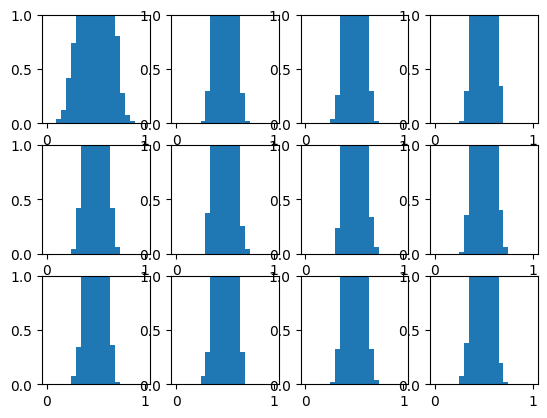

-- Tanh


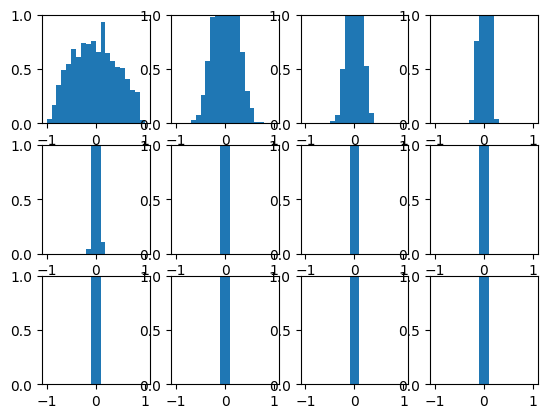

-- ReLU


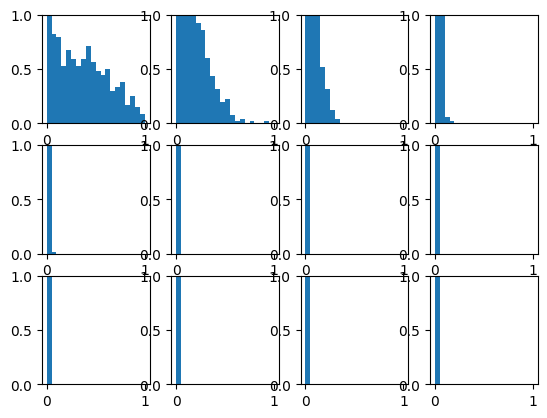

Xavierの初期化
-- Sigmoid


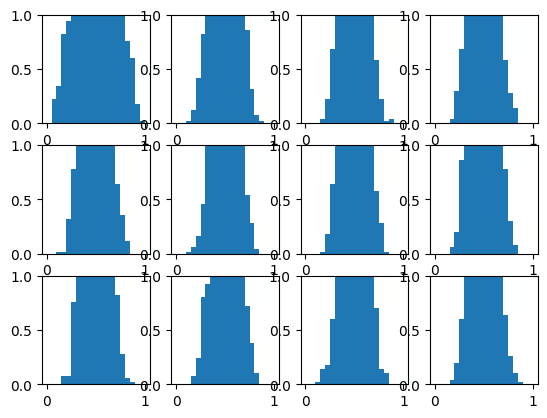

-- Tanh


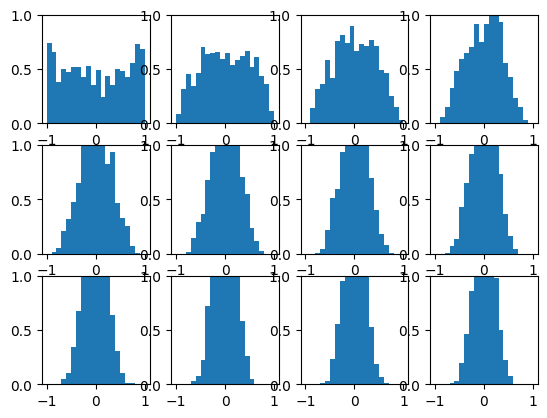

--ReLU


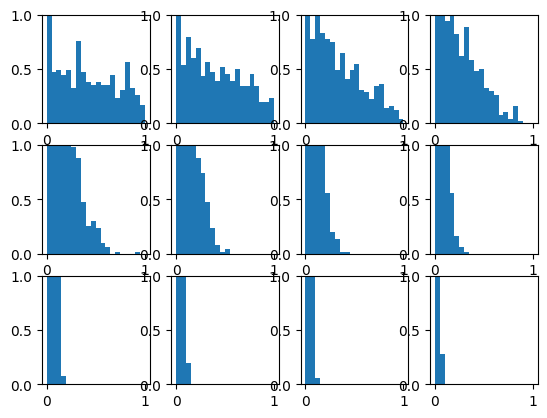

Kaiming
-- LeRU


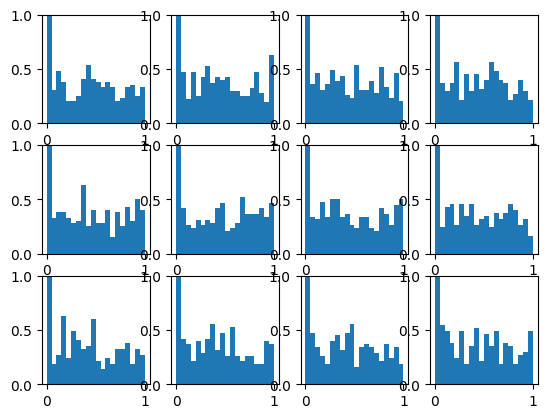

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.utils as util
import random
from typing import Callable, List
import matplotlib.pyplot as plt
n_layers = 12
in_features = 1000
out_features = 1000
activation_sigmoid = nn.Sigmoid()
activation_tanh = nn.Tanh()
activation_relu = nn.ReLU()
class CustumInitNet(nn.Module): # 実験用ネットワーク
    def __init__(
        self,
        n_layers: int,
        in_features: int,
        out_features: int,
        activation: nn.Module,
        func_init_weight: Callable[[torch.Tensor], None],
    ) -> None:
        super().__init__()
        self._fc = []
        for i in range(n_layers):
            self._fc.append(nn.Linear(in_features, out_features))
            func_init_weight(self._fc[i].weight.data)
            nn.init.zeros_(self._fc[i].bias.data)
        self._activation = activation
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        out = x
        self._out_list = []
        for i in range(len(self)):
            out = self._fc[i](out)
            out = self._activation(out)
            self._out_list.append(out)
        return out
    def get_layter_out_list(self) -> List[torch.Tensor]:
        return self._out_list
    def __len__(self):
        return len(self._fc)
def visualize(net: CustumInitNet, x_in: torch.Tensor, hist_range: List[int]) -> None:
    out = net.forward(x_in)
    x_out_list = net.get_layter_out_list()
    loss_func = nn.MSELoss()
    loss_value = loss_func(out, torch.zeros_like(out))
    loss_value.backward()
    figure = plt.figure()
    for i in range(len(net)):
        ax = figure.add_subplot(3, 4, i+1)
        ax.hist(x_out_list[i].detach().numpy(), bins=20, range=hist_range, density=True)
        ax.set_xlim
        ax.set_ylim([0, 1])
    plt.show()
print("普通の初期化")
func_init_weight = lambda weight: (
    nn.init.uniform_(weight, -1.0 / np.sqrt(in_features), 1.0 / np.sqrt(in_features))
)
print("-- Sigmoid")
net = CustumInitNet(
    n_layers=n_layers, in_features=in_features, out_features=out_features,
    activation=activation_sigmoid,
    func_init_weight=func_init_weight,
)
x_in = torch.empty((in_features,)).normal_(0, 1).requires_grad_()
visualize(net, x_in, hist_range=[0, 1])
print("-- Tanh")
net = CustumInitNet(
    n_layers=n_layers, in_features=in_features, out_features=out_features,
    activation=activation_tanh,
    func_init_weight=func_init_weight,
)
x_in = torch.empty((in_features,)).normal_(0, 1)
visualize(net, x_in, hist_range=[-1, 1])
print("-- ReLU")
net = CustumInitNet(
    n_layers=n_layers, in_features=in_features, out_features=out_features,
    activation=activation_relu,
    func_init_weight=func_init_weight,
)
x_in = torch.empty((in_features,)).normal_(0, 1)
visualize(net, x_in, hist_range=[0, 1])
print("Xavierの初期化")
'''
func_init_weight = lambda weight: (
    nn.init.uniform_(
        weight,
        -np.sqrt(6 / (in_features + out_features)),
        np.sqrt(6 / (in_features + out_features)),
    )
)
'''
func_init_weight = lambda weight: (
    nn.init.xavier_uniform_(weight)
)
print("-- Sigmoid")
net = CustumInitNet(
    n_layers=n_layers, in_features=in_features, out_features=out_features,
    activation=activation_sigmoid,
    func_init_weight=func_init_weight,
)
x_in = torch.empty((in_features,)).normal_(0, 1)
visualize(net, x_in, hist_range=[0, 1])
print("-- Tanh")
net = CustumInitNet(
    n_layers=n_layers, in_features=in_features, out_features=out_features,
    activation=activation_tanh,
    func_init_weight=func_init_weight,
)
x_in = torch.empty((in_features,)).normal_(0, 1)
visualize(net, x_in, hist_range=[-1, 1])
print("--ReLU")
net = CustumInitNet(
    n_layers=n_layers, in_features=in_features, out_features=out_features,
    activation=activation_relu,
    func_init_weight=func_init_weight,
)
x_in = torch.empty((in_features,)).normal_(0, 1)
visualize(net, x_in, hist_range=[0, 1])
print("Kaiming")
func_init_weight = lambda weight: (
    nn.init.kaiming_normal_(weight, mode="fan_in", nonlinearity="relu")
)
print("-- LeRU")
net = CustumInitNet(
    n_layers=n_layers, in_features=in_features, out_features=out_features,
    activation=activation_relu,
    func_init_weight=func_init_weight,
)
x_in = torch.empty((in_features,)).normal_(0, 1).requires_grad_()
visualize(net, x_in, hist_range=[0, 1])

# 課題

Pix2pixによるカラー化において、自分で準備、もしくは作成した白黒画像を実際にカラー化しなさい
- 本内容で得られたコード、学習結果を利用してよい
- 解像度は問わない

# 課題2

CycleGANを実装しなさい
- 検索すると様々な実装がなされている
- Colaboratory上に実装し、例えばウマをシマウマに変更するなどの効果を確認しなさい

https://github.com/DH-rgb/cycle-gan

https://colab.research.google.com/github/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/CycleGAN.ipynb

などがある

# 課題3

Conditional GANを用いて、CelebAを用い、CelebAが持つ様々な属性値で画像を抽出、これを属性値の条件として狙った画像を生成させなさい
- 例えば、9) 黒髪かどうか、10) ブロンドヘアーかどうか、12) ブラウンヘアーかどうか、16) 眼鏡をかけているかどうか、21) 男性か女性か、32) 笑っているかどうか、について画像を抽出する
- 画像枚数を揃えて、学習させる
- 狙ったクラスの画像が生成できることを確認する

例えば、以下を参考にColaboratoryで実装しなさい

http://cedro3.com/ai/pytorch-conditional-gan/


# 課題4

InfoGANを実装しなさい

# 課題5

StackGANについて、学習済みモデルを用い、実際に文章から画像を生成しなさい
- これに関しては、Diffusion Networkを用いた高品位な文章を用いた画像生成手法と学習済みモデルが実現・提供されている

- 参考として、逆にイメージから文章を作成する手法をImage Captioningと呼び、GANを用いずともモデルを構築できる
  - CNNでEncodeし、LSTMで文章を構築させる手法がある